# 19 Sep 23 - CHAOS

Over the last couple weeks we've been looking into a lot of 2 dimensional autonomous (the differential equations don't depend on time) systems of differential equations. 
Another thing we've noticed is that initial conditions in these systems tend to either blast off to infinity, form a closed loop, or are drawn to attracting fixed point(s) or limit cycle(s). In the case of attracting fixed points or limit cycles, many different initial conditions can be drawn to the same fixed point or limit cycle. In fact, we saw that it is possible for **every** initial condition to be drawn to the same limit cycle for the Van der Pol oscillator. This means that trajectories that are initially far apart eventually become close together.

This seems all well and good, but when we step up to 3 dimensional autonomous systems (or as we'll see later, non-autonomous 2D ones), some more interesting behavior starts to emerge. Trajectories that start out very close to each other can diverge from each other, while still not diverging to infinity. And it turns out that these sorts of **chaotic** systems arise surprisingly often in systems we're interested in in physics. The classic example of this is the double pendulum. Its also been shown that the solar system is chaotic for large time scales, and countless other systems exhibit this property. 

## Definition of Chaos

Here we'll follow Strogats's definition of chaos, which is:

***Chaos*** *is aperiodic long-term behavior in a deterministic system that exhibits sensitive dependence on initial conditions.*

1. **Aperiodic long-term behavior** means that some trajectories don't settle into fixed points, periodic orbits, or quasi-periodic orbits, while still not diverging to infinity.
2.  **Deterministic** means that the equations evolve in totally predictable ways, without any randomness. There are no noisy parameters or imputs.
3. **Sensitive dependence on initial conditions** means that nearby trajectories separate exponentially fast.

Let's investigate this phenomenon for a particular system.


## Halvorsen Attractor

One system we can start looking at is given by the **Halvorsen Equations:**

$$
\dot{x} = -ax - 4y - 4z - y^2
$$

$$
\dot{y} = -ay - 4z - 4x - z^2
$$

$$
\dot{z} = -az - 4x - 4y - x^2
$$

**&#9989; Do this** 



1. Review the code below. Talk to your neighbors about what it is doing. Feel free to experiment with more or less initial conditions. **You should be able to explain what this code is doing**
2. Based on our definition above, is this system chaotic? Why or why not? Discuss with your neighbors.
    - If it is chaotic and there is no limit cycle, what is drawing the trajectories?

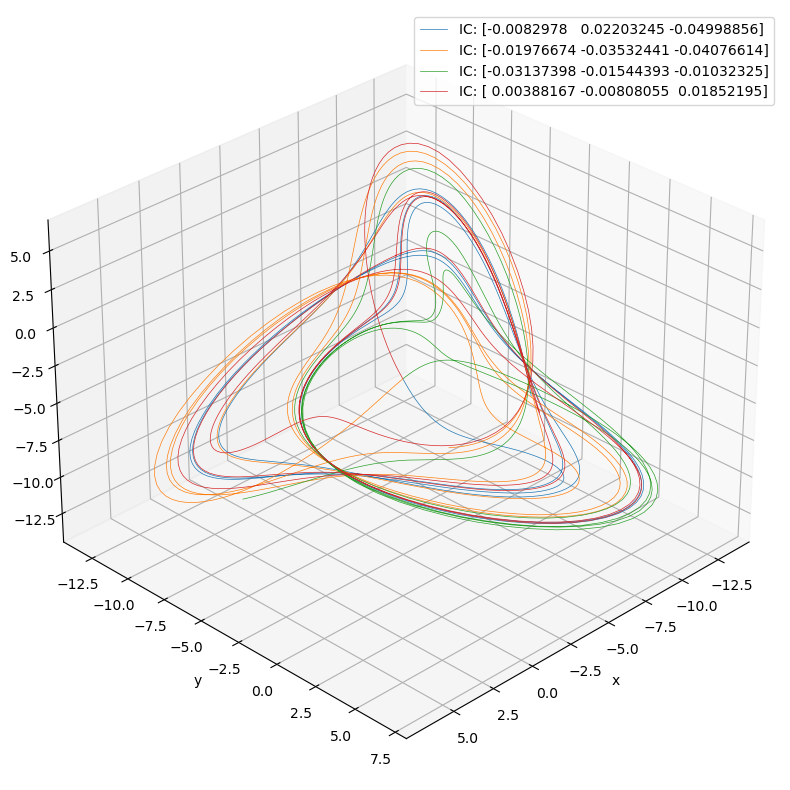

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def Halvorsen(t,curr_vals, a): 
    # Derivatives function for solve_ivp
    x,y,z = curr_vals 
    xdot = -a*x - 4*y - 4*z - y**2 
    ydot = -a*y - 4*z - 4*x - z**2
    zdot = -a*z - 4*x - 4*y - x**2
    return xdot,ydot,zdot

# Time Setup
tmax = 10
dt = 0.01
tspan = (0,tmax)
t = np.arange(0,tmax,dt)

# Parameters and initial conditions
a = 1.4
n_ics = 4 # number of initial conditions
n_dim = 3 # 3 dimensional problem
np.random.seed(1) # control randomness
initial_conditions = np.random.uniform(-0.05,0.05,(n_ics,n_dim)) # get n_ics initial conditions randomly from small box by the origin

# Call integrator for each initial condition
solutions = []
for initial_condition in initial_conditions:
    solved = solve_ivp(Halvorsen,tspan,initial_condition,t_eval = t, args = (a,))
    solutions.append(solved.y)

# Plotting
#%matplotlib widget ## UNCOMMENT TO BE ABLE TO PAN AROUND
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.view_init(30, 45) # Pick a nice initial viewing angle
for i,initial_condition in enumerate(initial_conditions):
    x,y,z = solutions[i]
    ax.plot3D(x,y,z, label = "IC: " +str(initial_condition),lw = 0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

## Lyapunov Exponents

One of our criteria for a system to be chaotic was that nearby trajectories must separate exponentially fast. Let's see if this holds true for this system:

**&#9989; Do this** 

1. Numerically calculate and plot the Euclidean distance ($||\delta(t)||$) between the first two trajectories  as a function of time. What do you notice?
2. Also calculate  $\log ||\delta(t)||$ and plot it. What do you notice now?

In [2]:
## your code here

The way that we characterize this divergence mathematically is with what are known as **Lyapunov Exponents**. Suppose we have some trajectory of a dynamical system $\mathbf{x}_1(t)$. Then we could write a nearby trajectory, lets say $\mathbf{x}_2(t)$ as $\mathbf{x}_2(t) = \mathbf{x}_1(t) + \delta(t)$ where $\delta(t) = \mathbf{x}_2(t) - \mathbf{x}_1(t)$. If trajectories initially separated by $\delta_0$ separate exponentially fast, then we would expect to see:

$$
||\delta(t)|| \sim ||\delta_0||e^{\lambda t}
$$

Where we call $\lambda$ the **Lyapunov Exponent** (technically it is the largest one of multiple). This also lets us write a very useful equation for how long a prediction of a chaotic system is within tolerance $a$:

$$
t_{\text{horizon}} \sim O\left(\frac{1}{\lambda}\log{\frac{a}{||\delta_0||}}\right)
$$

**&#9989; Do this** 

1. Use $\log ||\delta(t)||$ that you calculated above and `np.polyfit` to estimate the value of $\lambda$ for the Halvorsen system.
    - You'll need to eyeball where $\log ||\delta(t)||$ stops being linear.
2. Repeat this calculation for another set of 2 trajectories. Do you get a similar value for $\lambda$?
3. Many systems have negative values for $\lambda$. What does a negative value for $\lambda$ mean?

In [3]:
## your code here

## Driven Damped Pendulum

Now let's turn our attention to a more physics-y chaotic system, the Driven Damped Pendulum (DDP). This system is similar to the large angle pendulum that we've studied before, but it has a damping term $-2\beta\dot{\theta}$, as well as a driving time-dependent torque $\gamma \omega_0^2\cos(\omega t)$ . The full equation after sufficient non-dimensionalization looks like this (note: $\omega_0 \neq \omega$):

$$
\ddot{\theta} = - 2\beta\dot{\theta} - \omega_0^2\sin(\theta) + \gamma \omega_0^2 \cos(\omega t)
$$

It may be tempting to try to construct a phase portrait of this thing since it looks so similar to the large-angle pendulum, but since this equation is now time dependent, the phase portrait itself is time dependent, which makes it tricky to visualize without a third dimension or animations (making that could be part of a project though!).

The code below numerically integrates and plots the two trajectories of similar initial condition of the DPP for a set of parameters that are known to be chaotic.

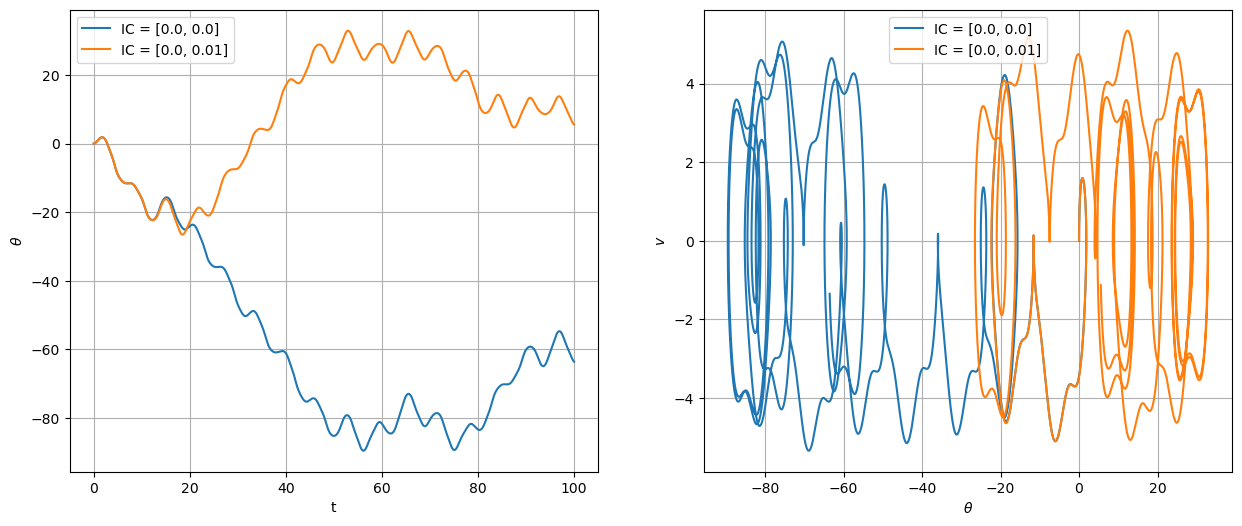

In [4]:
def DDP(t,curr_vals, beta,omega_natural,gamma,omega_drive): 
    # Derivatives function for solve_ivp
    theta,v = curr_vals 
    thetadot = v
    vdot = -2*beta*v - omega_natural * np.sin(theta) + gamma*omega_natural*np.cos(omega_drive*t)
    return thetadot,vdot

# Parameters and initial conditions (chosen so that they give chaos)
beta = 0.375/2
omega_natural = 1.5**2
omega_drive = 1
gamma = 1.5
initial_condition = [0.,0.]
initial_condition2 = [0.,0.01]

# Time Setup
tmax = 100.
dt = 0.01
t = np.arange(0,tmax, dt) 
tspan = (t[0],t[-1])

# Call integrator for each initial condition
solved = solve_ivp(DDP,tspan,initial_condition,t_eval = t, args = (beta,omega_natural,gamma,omega_drive))
solved2 = solve_ivp(DDP,tspan,initial_condition2,t_eval = t, args = (beta,omega_natural,gamma,omega_drive))

# Plotting
fig = plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(t,solved.y[0],label =  "IC = " + str(initial_condition))
plt.plot(t,solved2.y[0], label = "IC = " + str(initial_condition2) )
plt.xlabel("t")
plt.ylabel(r"$\theta$")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(solved.y[0],solved.y[1], label =  "IC = " + str(initial_condition))
plt.plot(solved2.y[0],solved2.y[1], label = "IC = " + str(initial_condition2))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$v$")
plt.legend()
plt.grid()
plt.show()

**&#9989; Do this** 

1. Discuss the above plots with your neighbors. 
    - Do you notice any patterns or is the motion totally unpredictable? 
    - Try increasing the integration time. Does that reveal any structure?
    - Can you think of looking at this system another way that would reveal more?

## Poincaré Section

To get a better sense of what's actually going on here, and to maybe have a hope of actually seeing if this thing has an attractor, we can use what is called a **Poincaré section**. The idea behind a Poincaré section is as follows: since the force term of this system is periodic, we should only look at points in phase space where the force term is at the same point in its cycle. Doing this reveals the breautiful fractal cross section of an attractor. 

**&#9989; Do this** 

Modify the code below to create a Poincaré section of the DPP. 
- Hint for line 5: How long is a drive period?
- Hint for line 17: The range of values that $\theta$ takes on is too large. What can you restrict them to?

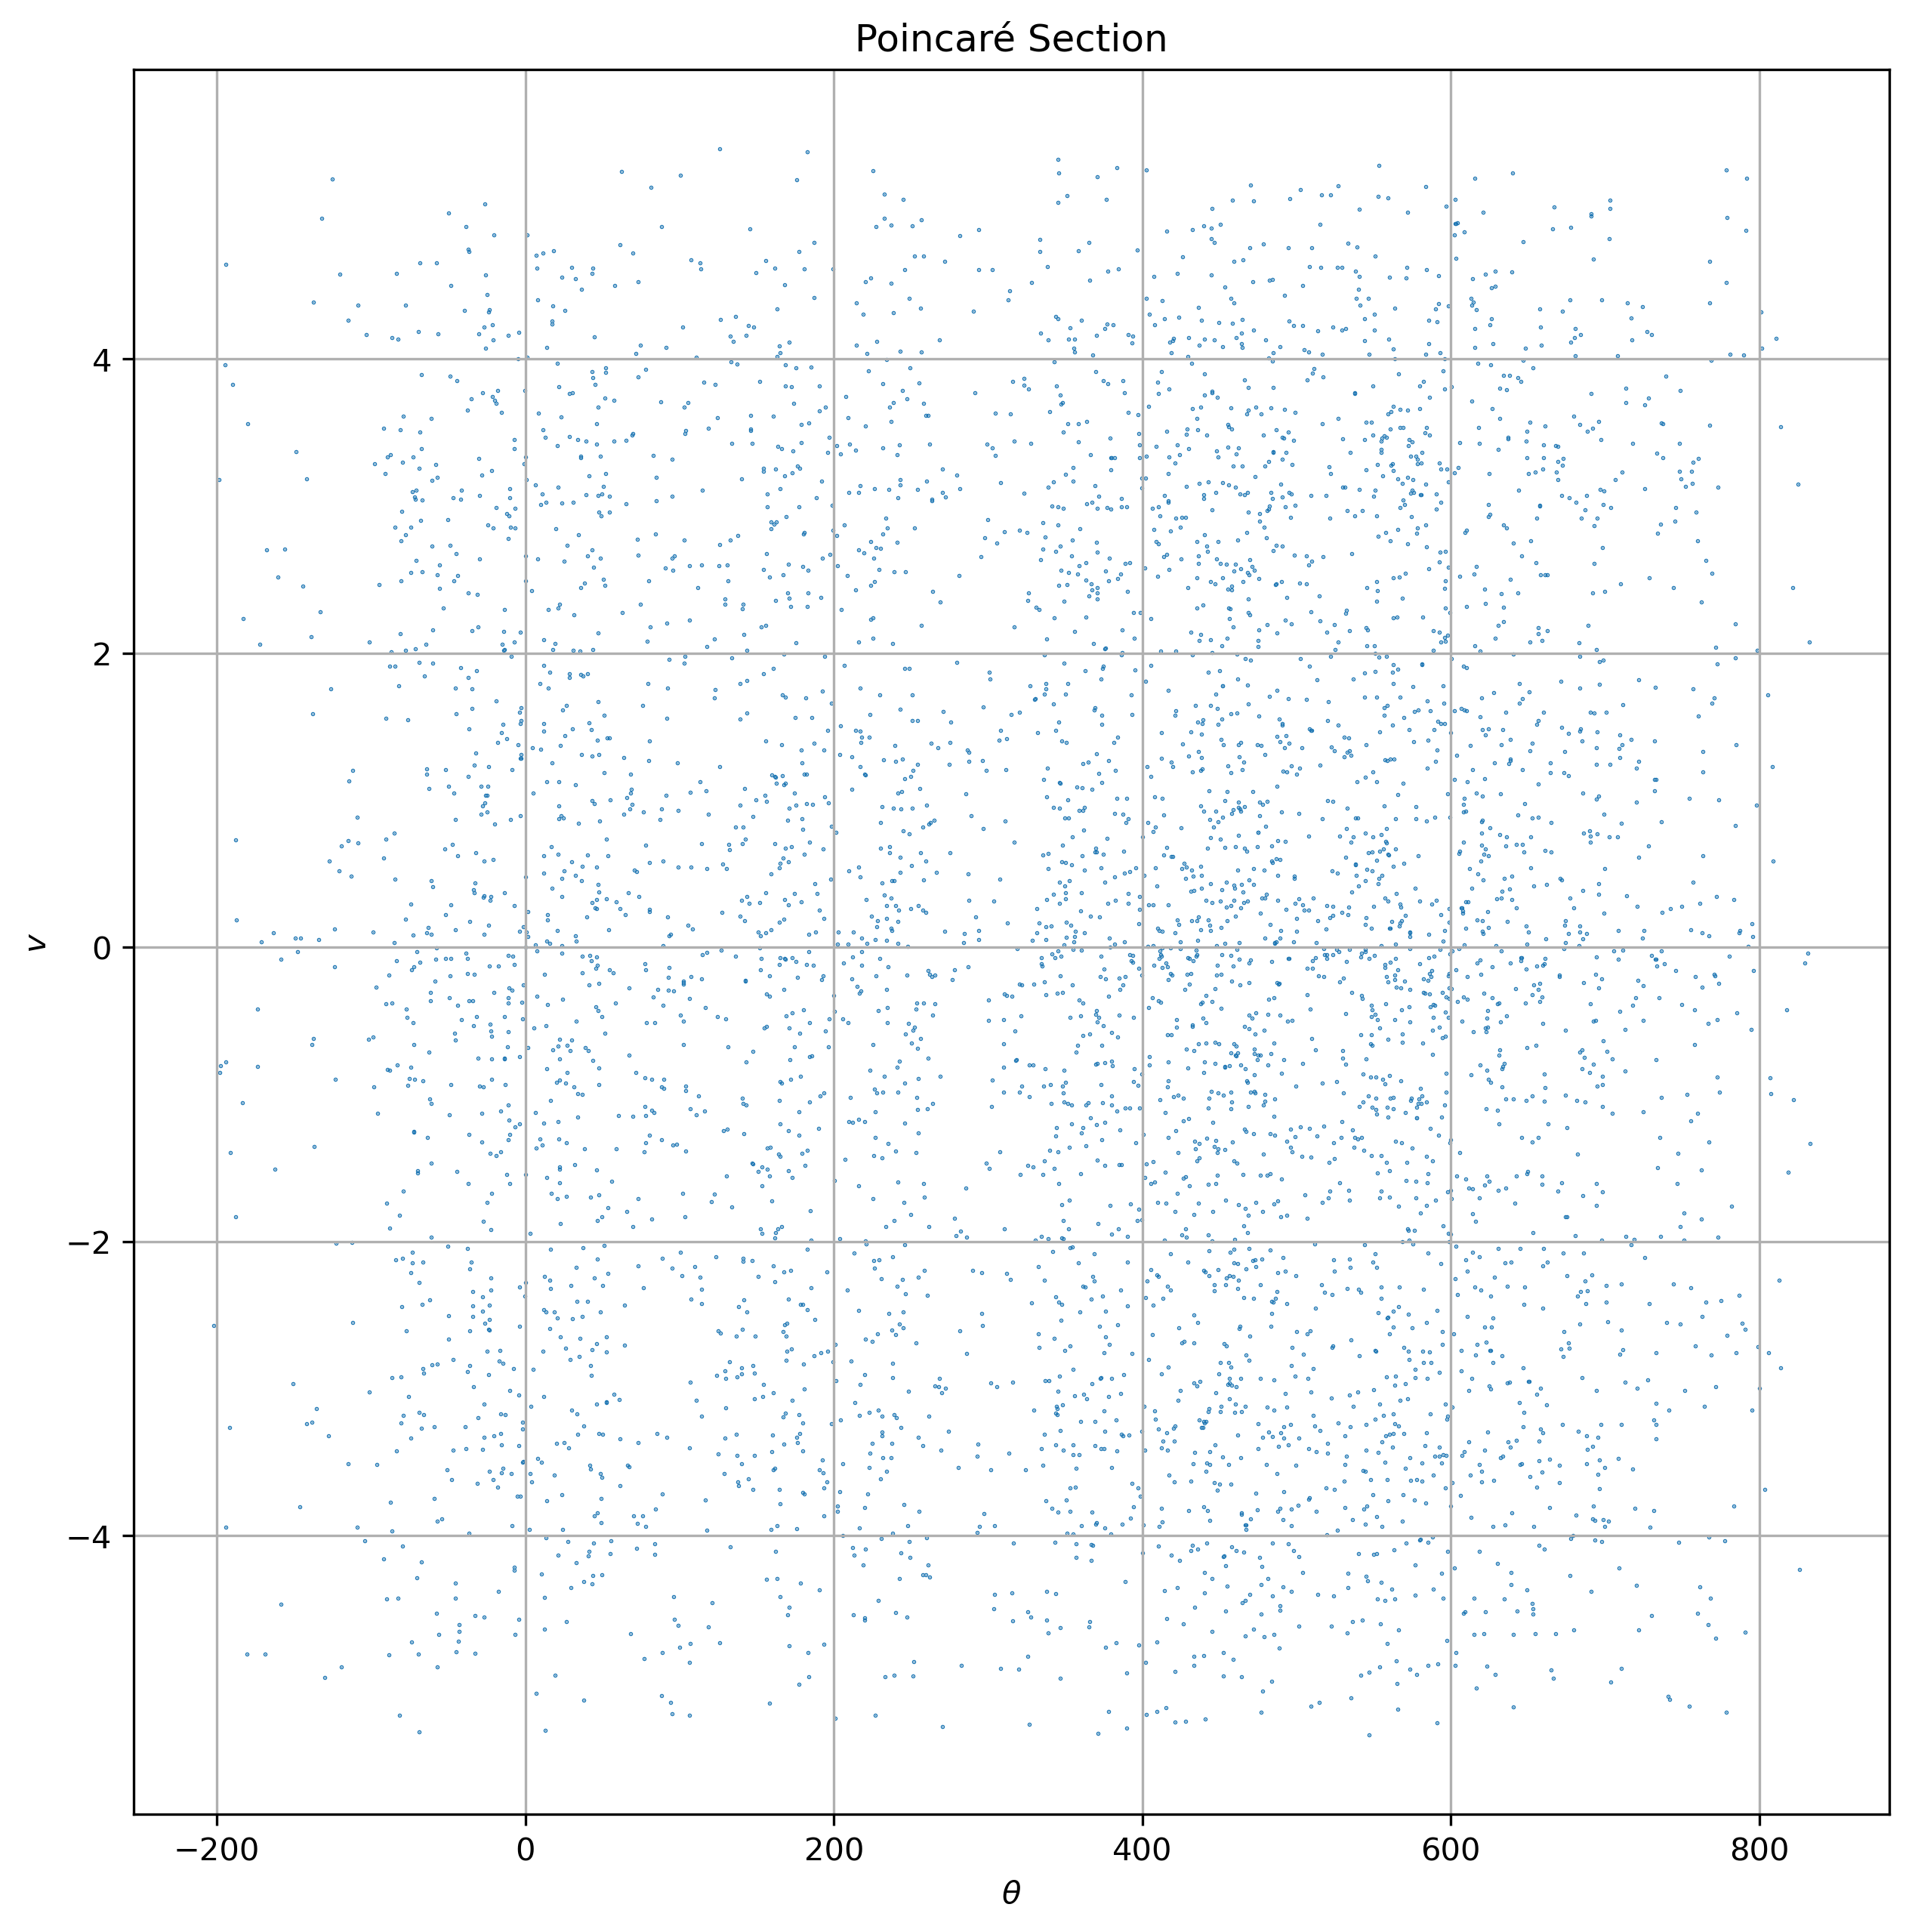

In [5]:
# Time Setup
N = 5000 # Number of Drive Periods to integrate for

##########
t_period = 2. ## CHANGE 
##########

t = np.linspace(0,N*t_period, N+1) # Note: this is not the same as the points used for integration, so we need not worry about this ruining our numerical accuracy
tspan = (t[0],t[-1])

# Call integrator for each initial condition
solved = solve_ivp(DDP,tspan,initial_condition,t_eval = t, args = (beta,omega_natural,gamma,omega_drive))

poincare_theta, v = solved.y[0],solved.y[1]

#######
poincare_theta = poincare_theta ## CHANGE
#######

# Plotting
fig = plt.figure(figsize = (10,10),dpi = 300)
plt.scatter(poincare_theta,v,s = 0.1)
plt.title("Poincaré Section")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$v$")
plt.grid()
plt.show()

**&#9989; Do this** 

Spend any time you have left in class investigating the DDP. Some things to try:

- Try decreasing the strength of the driving force by decreasing $\gamma$.
    - Is the system always chaotic for any $\gamma >0$?
    - How does the system's behavior change as you vary $\gamma$? 
    - Here you might want to look up **transient chaos** and **fractal basin boundaries**. Strogatz chapter 12 explains this well (and has some pretty pictures!).
- What does the Poincare section look like when you have more predictable motion?
    - How many points does it have?
    - Can you vary ICs or parameters to change how many points it has without giving in to total chaos?
    - Here you might want to look up **period doubling** and **fiegenbaum number** Taylor classical mechanics chapter 12 has some great stuff on this.
